In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv('data/apt-pranoto.csv', sep=";")

# Select the relevant columns for ARIMA model
columns = ['Tanggal','Tn','Tx','Tavg','RH_avg','RR','ss','ff_x','ddd_x','ff_avg','ddd_car']
data = df[columns]

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define the ARIMA model
order = (1, 0, 1)  # Define the order of AR, I, and MA components
model = ARIMA(train_data['RR'], order=order)

# Fit the model to the training data
model_fit = model.fit()

# Forecast the RR values for the test set
forecast_values = model_fit.forecast(steps=len(test_data))

# Evaluate the model
actual_values = test_data['RR']
mse = np.mean((forecast_values - actual_values) ** 2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Make predictions for future periods
future_periods = 12  # Number of periods to forecast into the future
forecast_future = model_fit.forecast(steps=future_periods)

# Print the forecasted values for future periods
print("Forecasted RR for future periods:")
print(forecast_future)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Root Mean Squared Error (RMSE): 3057.689161863364
Forecasted RR for future periods:
6853    831.405818
6854    831.074402
6855    830.743396
6856    830.412799
6857    830.082611
6858    829.752831
6859    829.423459
6860    829.094495
6861    828.765937
6862    828.437786
6863    828.110041
6864    827.782701
Name: predicted_mean, dtype: float64


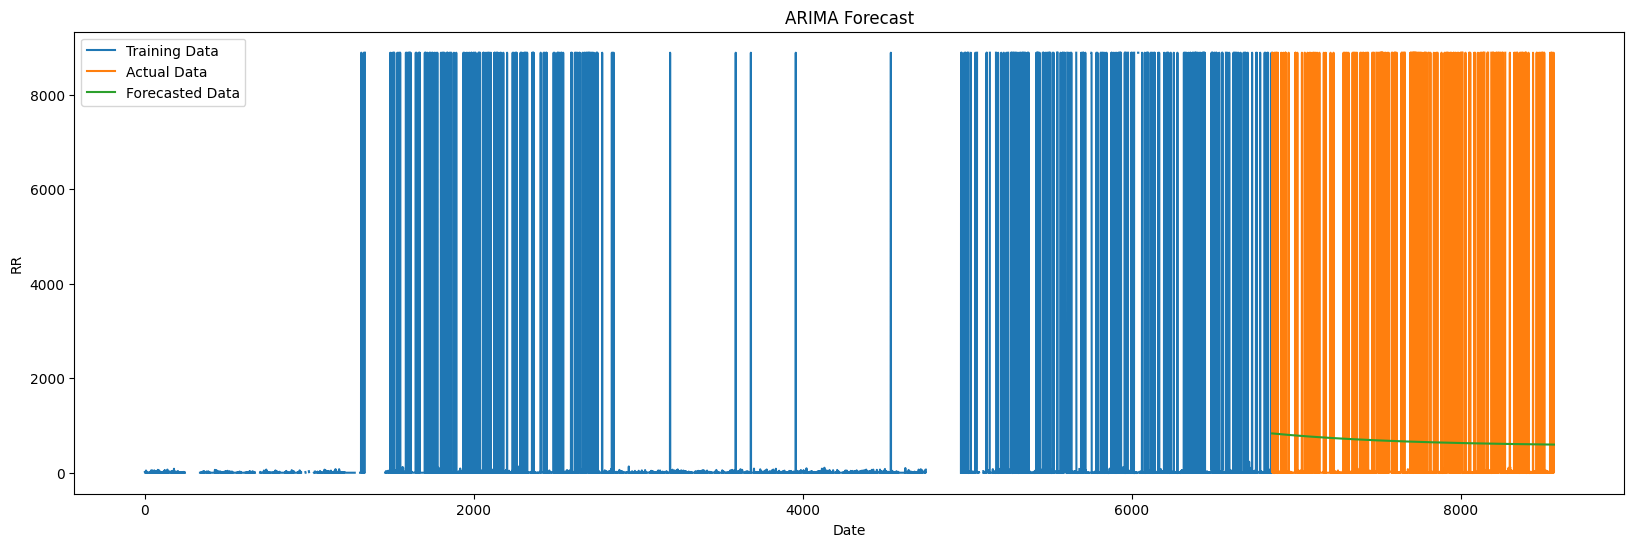

In [63]:
import matplotlib.pyplot as plt

# Plot the actual and forecasted values
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, train_data['RR'], label='Training Data')
plt.plot(test_data.index, test_data['RR'], label='Actual Data')
plt.plot(test_data.index, forecast_values, label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('RR')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()